# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [67]:
%matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [19]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].str.replace('€',' ').str.replace('M', ' ').str.replace('K', ' ').astype(float)
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric      float64
dtype: object

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [90]:
# Your code here:
#c = f_oneway(fifa['Preferred Foot'], fifa['Position'])
#mod = ols('Preferred Foot ~ Position', data = fifa).fit()
#aov_table = sm.stats.anova_lm(mod, typ=2)
#aov_table

fifa = fifa.rename(columns={"Preferred Foot": 'Preferred_Foot'})

model = ols('ValueNumeric ~ C(Preferred_Foot) +C(Position)', data=fifa)
results = model.fit()
anova_table = sm.stats.anova_lm(results, typ=2)
anova_table

#mod = ols('Preferred_Foot~Position', data=fifa).fit()
#anov_table = sm.stats.anova_lm(mod, typ=2)
#anov_table --> Error de shape (¿Será por no incluir el "C"?)

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),7.292211e+04,1.0,0.871795,3.504713e-01
C(Position),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
#Se rechaza la hipotesis nula que indicaba que el valor promedio de mercado de los jugadores es igual. Por lo tanto, sí afecta el valor de mercado
#Main purpose: rechazar la hipotesis nula

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [58]:
# Your code here:
model = ols('ValueNumeric ~ C(Nationality)', data=fifa)
results = model.fit()
anova_table = sm.stats.anova_lm(results, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


In [ ]:
#Se rechaza la hipotesis que los jugadores valen igual. La nacionaldiad afecta

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [65]:
# Your code here:
fifa.isnull().sum()
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
Name              18207 non-null object
Age               18207 non-null int64
Nationality       18207 non-null object
Overall           18207 non-null int64
Potential         18207 non-null int64
Club              17966 non-null object
Value             18207 non-null object
Preferred_Foot    18159 non-null object
Position          18147 non-null object
Weak Foot         18159 non-null float64
Acceleration      18159 non-null float64
SprintSpeed       18159 non-null float64
Stamina           18159 non-null float64
Strength          18159 non-null float64
LongShots         18159 non-null float64
Aggression        18159 non-null float64
Interceptions     18159 non-null float64
Positioning       18159 non-null float64
Vision            18159 non-null float64
Penalties         18159 non-null float64
ValueNumeric      18207 non-null float64
dtypes: float64(12), int64(3), object(6)
m

In [66]:
fifa1 = fifa.dropna()
fifa1.isnull().sum()
fifa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
Name              17918 non-null object
Age               17918 non-null int64
Nationality       17918 non-null object
Overall           17918 non-null int64
Potential         17918 non-null int64
Club              17918 non-null object
Value             17918 non-null object
Preferred_Foot    17918 non-null object
Position          17918 non-null object
Weak Foot         17918 non-null float64
Acceleration      17918 non-null float64
SprintSpeed       17918 non-null float64
Stamina           17918 non-null float64
Strength          17918 non-null float64
LongShots         17918 non-null float64
Aggression        17918 non-null float64
Interceptions     17918 non-null float64
Positioning       17918 non-null float64
Vision            17918 non-null float64
Penalties         17918 non-null float64
ValueNumeric      17918 non-null float64
dtypes: float64(12), int64(3), object(6)
m

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [71]:
# Your code here:

#linregress(fifa1.Stamina, fifa1.ValueNumeric) --> Sirve para 1 varaible independiente
X = sm.add_constant(fifa1[['Stamina', 'SprintSpeed']])
Y = fifa1.ValueNumeric
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print_model

C:\Users\52557\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Wed, 31 Jul 2019   Prob (F-statistic):             0.0116
Time:                        19:18:15   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:
#The prob(F-Statistics) is less than 0.05, therefore the hypotesis is rejected
#there is a very low value on R-squared


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [72]:
# Your code here:
X = sm.add_constant(fifa1[['Potential']])
Y = fifa1.ValueNumeric
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          9.15e-225
Time:                        19:25:06   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:
##there is a very low value on R-squared (0.05)


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

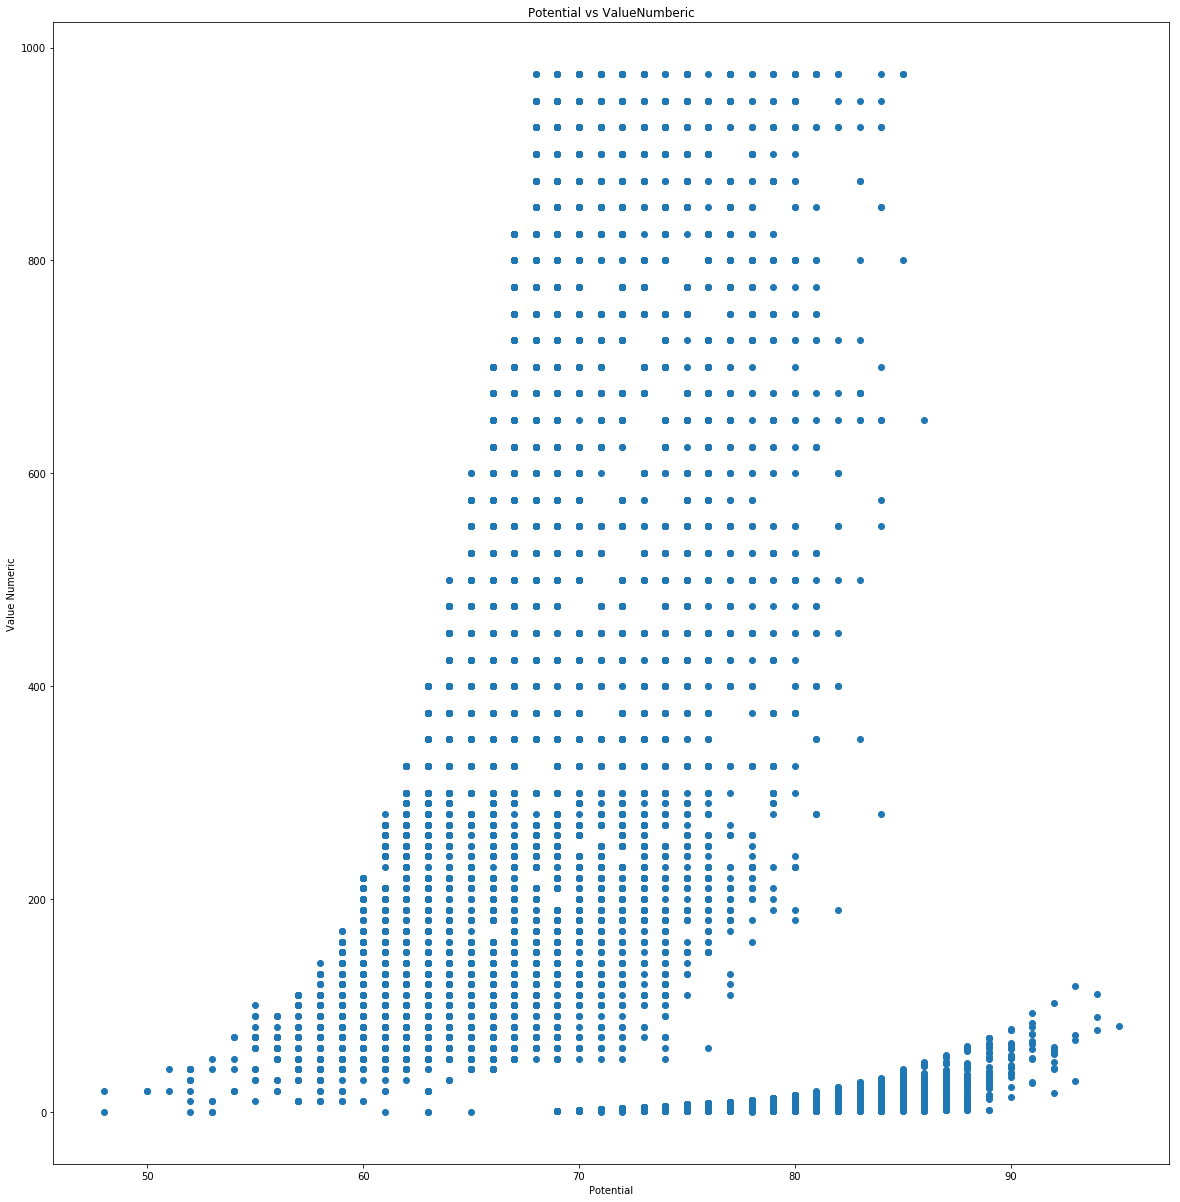

In [84]:
# Your code here:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,21))
plt.scatter('Potential','ValueNumeric' , data= fifa1)
plt.title('Potential vs ValueNumberic')
plt.xlabel('Potential')
plt.ylabel('Value Numeric')
plt.show()
#No lineal relationship